x_prime type:
 <class 'pandas.core.frame.DataFrame'>
y type:
 <class 'numpy.ndarray'>
特征： 花萼长度 + 花萼宽度
	训练数据集上准确率：80.9524%
	测试数据集上准确率：66.6667%
x0_min:  4.3 
x0_max 7.7
特征： 花萼长度 + 花瓣长度
	训练数据集上准确率：95.2381%
	测试数据集上准确率：95.5556%
x0_min:  4.3 
x0_max 7.7
特征： 花萼长度 + 花瓣宽度
	训练数据集上准确率：96.1905%
	测试数据集上准确率：95.5556%
x0_min:  4.3 
x0_max 7.7
特征： 花萼宽度 + 花瓣长度
	训练数据集上准确率：95.2381%
	测试数据集上准确率：95.5556%
x0_min:  2.0 
x0_max 4.4
特征： 花萼宽度 + 花瓣宽度
	训练数据集上准确率：96.1905%
	测试数据集上准确率：95.5556%
x0_min:  2.0 
x0_max 4.4
特征： 花瓣长度 + 花瓣宽度
	训练数据集上准确率：98.0952%
	测试数据集上准确率：95.5556%
x0_min:  1.0 
x0_max 6.9


/home/kukafee/environments/tf2_py3/lib/python3.6/site-packages/ipykernel_launcher.py:84: UserWarning: The following kwargs were not used by contour: 'color'
/home/kukafee/environments/tf2_py3/lib/python3.6/site-packages/ipykernel_launcher.py:84: UserWarning: The following kwargs were not used by contour: 'color'
/home/kukafee/environments/tf2_py3/lib/python3.6/site-packages/ipykernel_launcher.py:84: UserWarning: The following kwargs were not used by contour: 'color'
/home/kukafee/environments/tf2_py3/lib/python3.6/site-packages/ipykernel_launcher.py:84: UserWarning: The following kwargs were not used by contour: 'color'
/home/kukafee/environments/tf2_py3/lib/python3.6/site-packages/ipykernel_launcher.py:84: UserWarning: The following kwargs were not used by contour: 'color'
/home/kukafee/environments/tf2_py3/lib/python3.6/site-packages/ipykernel_launcher.py:84: UserWarning: The following kwargs were not used by contour: 'color'


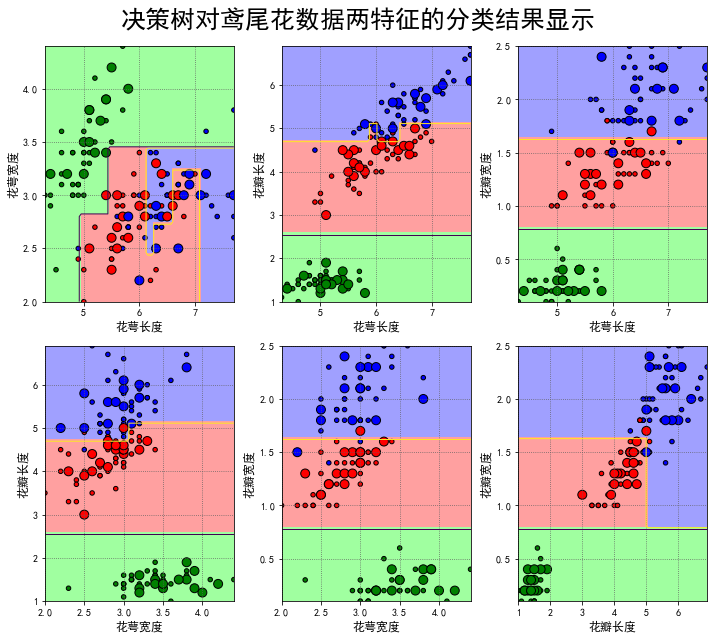

In [67]:
# 基于鸢尾花数据进行的决策树[枚举不同的特征两两组合
#!/urs/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score


def main():
    iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
    iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
    iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
    # 定义数据文件路径
    path = './iris.data'
    data = pd.read_csv(path, header=None)    # header=None 表示无首行列索引
#     print('data type: ', type(data))
#     print('data head: \n', data.head())
    
    x_prime = data[list(range(4))]
    y_prime = pd.Categorical(data[4]).codes    # 对类型进行编码 [0, 1, 2]
    print('x_prime type:\n', type(x_prime))
    print('y type:\n', type(y_prime))
#     print('y:\n', y)    # [0, 1, 1, 2, ......]
      
    x_prime_train, x_prime_test, y_train, y_test = train_test_split(x_prime, y_prime, train_size=0.7, 
                                                                    random_state=1)
    
    # 定义特征组合（特征对）
    feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
    
    # 定义一个小画板
    plt.figure(figsize=(10, 9), facecolor='#FFFFFF')
    
    # 遍历每一个特征对，分别训练数据
    for i, pair in enumerate(feature_pairs):
        # 准备数据
        x_train = x_prime_train[pair]
        x_test = x_prime_test[pair]
        
        # 定义决策树并训练模型
        # min_samples_leaf=3 表示若将某结点分之后，得到的每个子结点中样本数目大于3，则分支，否则不分支
        # min_samples_split=3 表示若该结点包含的样本数目大于3个，则（有可能）分支，否则不分支
        model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
#         print('x_train:\n', x_train)
#         print('y_train:\n', y_train)
        model = model.fit(x_train, y_train)
        
        # 模型的预测
        y_train_pred = model.predict(x_train)
        acc_train = accuracy_score(y_train, y_train_pred)
        y_test_pred = model.predict(x_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        # 打印显示结果
        print('特征：', iris_feature[pair[0]], '+', iris_feature[pair[1]])
        print('\t训练数据集上准确率：%.4f%%'%(100*acc_train))
        print('\t测试数据集上准确率：%.4f%%'%(100*acc_test))
        
        
        # 可视化显示
        N, M = 100, 100    
        x0_min, x1_min = x_train.min()
        x0_max, x1_max = x_train.max()
        t0 = np.linspace(x0_min, x0_max, N)    
        t1 = np.linspace(x1_min, x1_max, M)
        x0, x1 = np.meshgrid(t0, t1)
        x0_flat, x1_flat = x0.flat, x1.flat
        x_show = np.stack((x0_flat, x1_flat), axis=1)
        
        cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
        cm_dart = mpl.colors.ListedColormap(['g', 'r', 'b'])
        y_show_hat = model.predict(x_show)
        y_show_hat = y_show_hat.reshape(x1.shape)
        
        # 定义画板：二行三列
        plt.subplot(2, 3, i+1)
        plt.contour(x0, x1, y_show_hat, color='k', levels=[0, 1], antialiased=True, linewidths=1)
        plt.pcolormesh(x0, x1, y_show_hat, cmap=cm_light)
        plt.scatter(x_train[pair[0]], x_train[pair[1]], c=y_train, s=20, edgecolors='k',
                    cmap=cm_dart, label='训练集')
        plt.scatter(x_test[pair[0]], x_test[pair[1]], c=y_test, s=80, edgecolors='k',
                   cmap=cm_dart, label='测试集')
        plt.xlabel(iris_feature[pair[0]], fontsize=12)
        plt.ylabel(iris_feature[pair[1]], fontsize=12)
        print('x0_min: ', x0_min, '\nx0_max', x0_max)
        plt.xlim(x0_min, x0_max)
        plt.ylim(x1_min, x1_max)
        plt.grid(b=True, ls=':', color='#606060')
    # 定义总图的title标题
    plt.suptitle('决策树对鸢尾花数据两特征的分类结果显示', fontsize=25)
    plt.tight_layout(1, rect=(0, 0, 1, 0.94))
    
    plt.show()
        
        
        
if __name__ == "__main__":
    main()